# Importing Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data

In [46]:
data = pd.read_csv("weatherAUS.csv")

# Data Exploration

In [47]:
print(data.head())
print(data.info())
print(data.describe())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

# Data Visualization

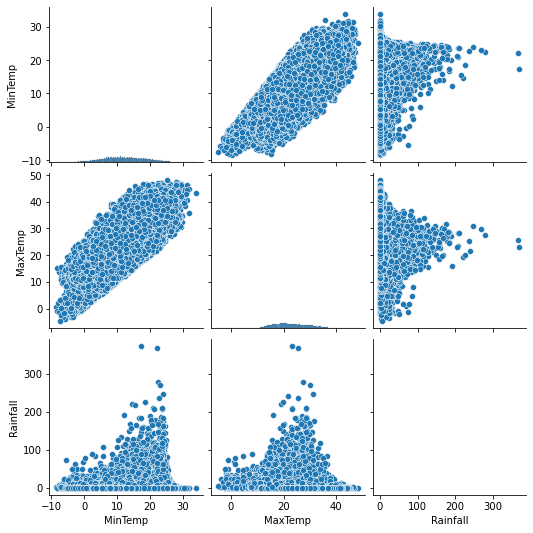

In [48]:
sns.pairplot(data[['MinTemp','MaxTemp','Rainfall']])
plt.show()

In [49]:
data['Date'] = pd.to_datetime(data['Date'])

In [50]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <=8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

data['Month'] = data['Date'].dt.month
data['Season'] = data['Month'].apply(get_season)

In [51]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,12,Winter
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,12,Winter
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12,Winter
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,12,Winter
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,Winter


<Figure size 576x432 with 0 Axes>

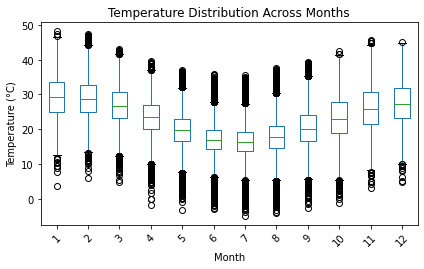

In [52]:
plt.figure(figsize=(8,6))
data.boxplot(column='MaxTemp',by='Month',grid=False)
plt.title('Temperature Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
data = data.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)
print(data.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Month            0
Season           0
dtype: int64


In [54]:
correlation = data.corr()
print(correlation)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.749687  0.110800     0.506764  0.076087   
MaxTemp        0.749687  1.000000 -0.069981     0.650964  0.463913   
Rainfall       0.110800 -0.069981  1.000000    -0.077239 -0.246379   
Evaporation    0.506764  0.650964 -0.077239     1.000000  0.369250   
Sunshine       0.076087  0.463913 -0.246379     0.369250  1.000000   
WindGustSpeed  0.118054  0.035531  0.106308     0.209566 -0.052422   
WindSpeed9am   0.108522 -0.008171  0.050584     0.193154 -0.013842   
WindSpeed3pm   0.137273  0.012266  0.044112     0.124345  0.029200   
Humidity9am   -0.174991 -0.495781  0.263625    -0.554232 -0.500343   
Humidity3pm    0.070827 -0.448116  0.277625    -0.422436 -0.629299   
Pressure9am   -0.475661 -0.350980 -0.180606    -0.297319  0.043330   
Pressure3pm   -0.495577 -0.451691 -0.137302    -0.325954 -0.020632   
Cloud9am       0.106177 -0.263634  0.217169    -0.199809 -0.677939   
Cloud3pm       0.042

<AxesSubplot:>

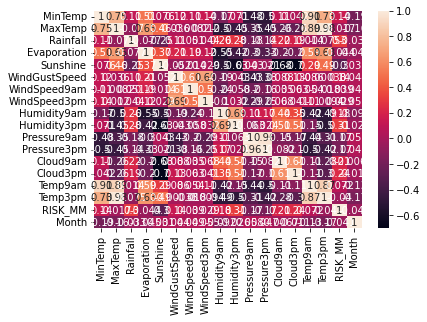

In [55]:
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# Data Analysis & Data Visualization

# Temperature

In [56]:
monthly_avg_max_temp = data.groupby('Month')['MaxTemp'].mean()
monthly_avg_max_temp

Month
1     30.124340
2     29.507827
3     27.592114
4     24.594708
5     21.022406
6     18.498598
7     18.080697
8     19.475042
9     21.902824
10    24.456911
11    26.906954
12    28.310342
Name: MaxTemp, dtype: float64

In [57]:
seasonly_avg_max_temp = data.groupby('Season')['MaxTemp'].mean()
seasonly_avg_max_temp

Season
Autumn    24.436510
Spring    24.457984
Summer    18.687766
Winter    29.372733
Name: MaxTemp, dtype: float64

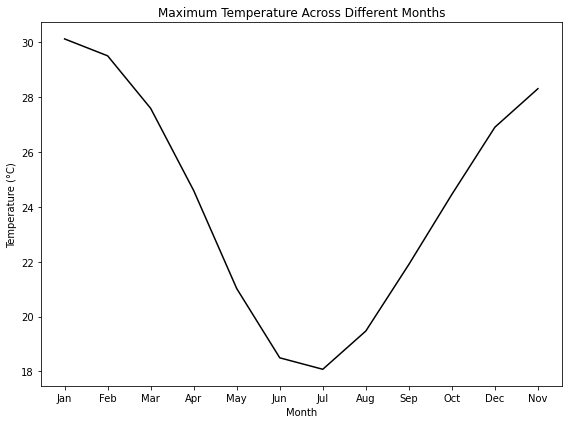

In [58]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
plt.figure(figsize=(8, 6))
plt.plot(months, monthly_avg_max_temp, color='black')
plt.title('Maximum Temperature Across Different Months')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

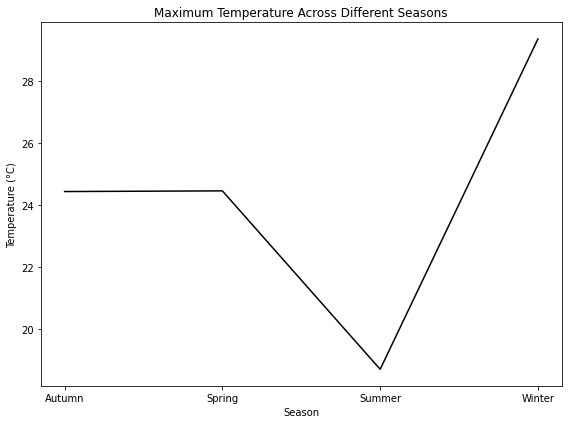

In [59]:
seasons = ['Autumn', 'Spring', 'Summer', 'Winter']
plt.figure(figsize=(8, 6))
plt.plot(seasons, seasonly_avg_max_temp, color='black')
plt.title('Maximum Temperature Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

# Windspeed

In [60]:
monthly_avg_max_windspeed = data.groupby('Month')['WindGustSpeed'].mean()
monthly_avg_max_windspeed

Month
1     44.097399
2     42.126035
3     40.339196
4     37.421303
5     37.237745
6     37.006353
7     39.224464
8     41.414340
9     42.732428
10    42.941176
11    42.731185
12    43.054878
Name: WindGustSpeed, dtype: float64

In [61]:
seasonly_avg_max_windspeed = data.groupby('Season')['WindGustSpeed'].mean()
seasonly_avg_max_windspeed

Season
Autumn    42.802908
Spring    38.401049
Summer    39.240751
Winter    43.168459
Name: WindGustSpeed, dtype: float64

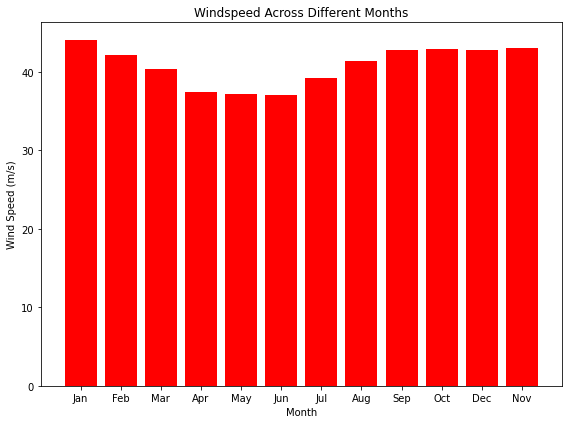

In [62]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
plt.figure(figsize=(8, 6))
plt.bar(months, monthly_avg_max_windspeed, color='red')
plt.title('Windspeed Across Different Months')
plt.grid(False)
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

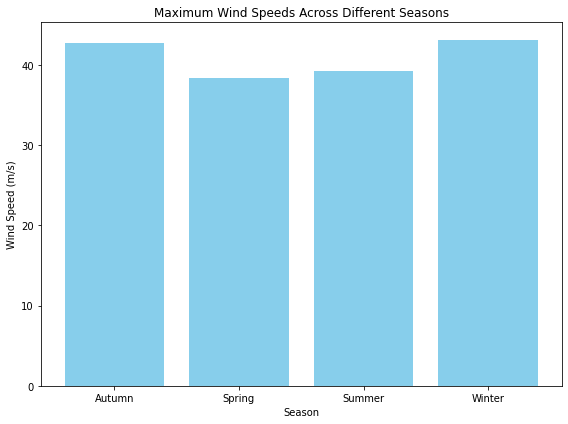

In [63]:
seasons = ['Autumn', 'Spring', 'Summer', 'Winter']
plt.figure(figsize=(8, 6))
plt.bar(seasons, seasonly_avg_max_windspeed, color='skyblue')
plt.title('Maximum Wind Speeds Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()
plt.show()

# Rainfall

In [64]:
monthly_avg_max_rainfall = data.groupby('Month')['Rainfall'].mean()
monthly_avg_max_rainfall

Month
1     2.754224
2     2.962071
3     2.402319
4     2.011940
5     1.775429
6     2.302760
7     1.840348
8     1.754928
9     1.583980
10    1.590148
11    2.161374
12    2.457200
Name: Rainfall, dtype: float64

In [65]:
seasonly_avg_max_hum = data.groupby('Season')['Rainfall'].mean()
seasonly_avg_max_hum

Season
Autumn    1.778335
Spring    2.071412
Summer    1.962263
Winter    2.726061
Name: Rainfall, dtype: float64

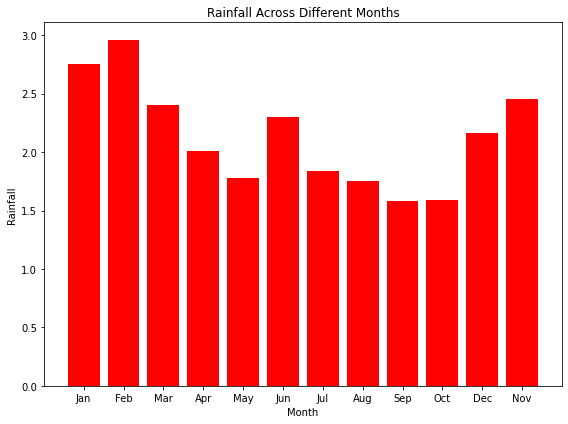

In [66]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
plt.figure(figsize=(8, 6))
plt.bar(months, monthly_avg_max_hum, color='red')
plt.title('Rainfall Across Different Months')
plt.grid(False)
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

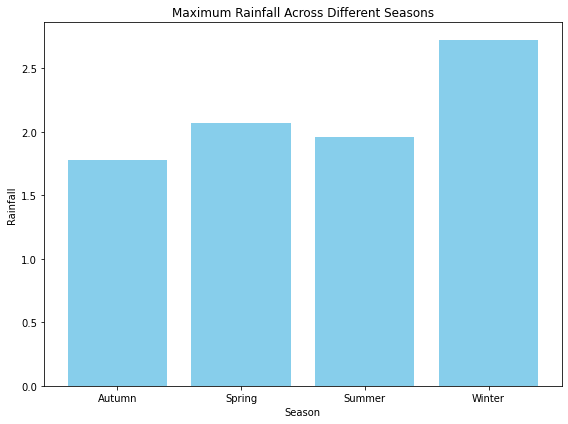

In [67]:
seasons = ['Autumn', 'Spring', 'Summer', 'Winter']
plt.figure(figsize=(8, 6))
plt.bar(seasons, seasonly_avg_max_hum, color='skyblue')
plt.title('Maximum Rainfall Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

# Humidity

In [68]:
monthly_avg_max_humidity = data.groupby('Month')['Humidity9am'].mean()
monthly_avg_max_humidity

Month
1     60.008734
2     64.820761
3     67.909934
4     68.135685
5     71.386642
6     75.875137
7     73.694203
8     67.861252
9     61.951272
10    59.928497
11    59.375662
12    59.636257
Name: Humidity9am, dtype: float64

In [69]:
seasonly_avg_max_hum = data.groupby('Season')['Humidity9am'].mean()
seasonly_avg_max_hum

Season
Autumn    60.406678
Spring    69.153395
Summer    72.435652
Winter    61.372238
Name: Humidity9am, dtype: float64

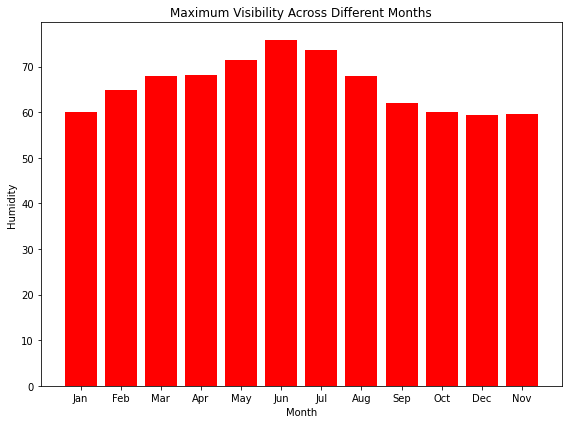

In [70]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
plt.figure(figsize=(8, 6))
plt.bar(months, monthly_avg_max_humidity, color='red')
plt.title('Maximum Visibility Across Different Months')
plt.grid(False)
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

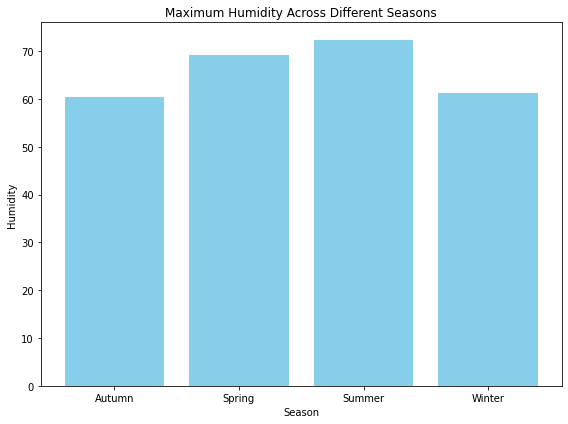

In [71]:
seasons = ['Autumn', 'Spring', 'Summer', 'Winter']
plt.figure(figsize=(8, 6))
plt.bar(seasons, seasonly_avg_max_hum, color='skyblue')
plt.title('Maximum Humidity Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

# Advanced Analysis

In [31]:
label_encoder = LabelEncoder()
data['Season'] = label_encoder.fit_transform(data['Season'])
print(data['Season'])

5939      3
5940      3
5942      3
5943      3
5944      3
         ..
139108    2
139109    2
139110    2
139111    2
139112    2
Name: Season, Length: 56420, dtype: int32


C:\Users\saite\AppData\Local\Temp\ipykernel_6656\1988514623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Season'] = label_encoder.fit_transform(data['Season'])


In [32]:
x = data[['MinTemp','MaxTemp']]
y = data['Rainfall']

Split the dataset into training and testing sets

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Create and train a linear regression model

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

Make predictions and calculate the Mean Squared Error

In [36]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

42.639609077303035


Conclusions and Insights 

In [40]:
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 1, Lowest rainfall month: 7
